In [ ]:
import time
import tracemalloc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from itertools import permutations
import random

In [ ]:
def print_board(board):
    '''
    print the board (might be helpful for debugging or for the report)
    '''
    n = len(board)
    display = np.zeros([n,n])
    # making alternate white and black rows and columns -  (odd row, even col and even row, odd col)
    display[1::2, ::2] = 1
    display[::2, 1::2] = 1
    fig, ax = plt.subplots()
    cols = ['white', 'gray']
    cmap = colors.ListedColormap(cols)
    ax.imshow(display, cmap=cmap, norm=colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    for i in range(n):
        if board[i] is not None:  # Only place queen if position is not None
            plt.text(i, board[i], u"\u265B", fontsize=48, ha='center', va='center')
    plt.show()
    print(f'Queens [L-r] at rows: {board}')

In [ ]:
def set_seed(seed_value):
    '''
    set seed value to reproduce the results
    input: seed_value
    '''
    np.random.seed(seed_value)

In [ ]:
def plot_results(backtracking_results=None,brute_force_results=None,iteration = 11):
    metric = ['_','_','_','_','run_Times', 'attacks', 'optimal solutions']
    for i in {4,5,6}:
        if backtracking_results != None :
          plt.plot(list(range(1, iteration)), backtracking_results[i], label='backtracking')
        if brute_force_results !=None:
          plt.plot(list(range(1, iteration)), brute_force_results[i], label='bruteforce')
        plt.xlabel('runs')
        plt.ylabel(metric[i].capitalize())
        plt.title(f'{metric[i].capitalize()} vs runs')
        plt.legend()
        plt.show()

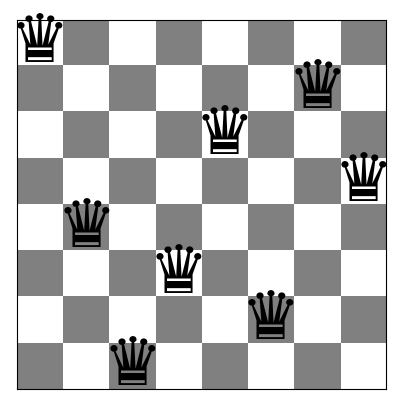

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0007 seconds
Memory usage: 2.16 KiB


(113,
 0.000720977783203125,
 2.15625,
 [None, None, None, None, None, None, None, None])

In [ ]:
def Backtracking(p=False):
  '''
    Executes the Backtracking algorithm for the N-Queens problem.
    This algorithm attempts to place N queens on an N×N chessboard such that no two queens
    threaten each other. It iteratively explores all possible configurations by placing a queen
    in a valid position within each column and backtracks upon encountering a constraint violation.
    Parameters:
    - p (bool): When True, displays the chessboard for each valid configuration found during the search.
                When False, displays the chessboard only for the final solution.
    Returns:
    - tuple: Contains the number of states checked, the total execution time excluding print time,
             and the memory usage in KiB.
    The function also prints the number of states checked, the total execution time, and the memory usage.
  '''

  global StartTime, EndTime, PrintTime,StartTimeP, EndTimeP
  tracemalloc.start()
  snapshot1 = tracemalloc.take_snapshot()#Taking a snapshot before solving
  N=8 #Board size
  StateCount=[0] #Visited state List
  StartTime=None #Start time
  EndTime=None #End time
  StartTimeP=None #Print Start time
  EndTimeP=None #Print End time
  PrintTime=0 #Printing total time
  chessboard=[None]*N
  def backtrack(col=0,chessboard=[None]*N):
          global StartTime, EndTime, PrintTime,StartTimeP, EndTimeP,snapshot1
          if col == 0 and StartTime is None:
              StartTime = time.time()
          if col==N:
              EndTime = time.time()
              if (p==False):
                print_board(chessboard)
              return True
          for row in range(N):
              #Checking the contraints
              Check=True
              for x in range(col):
                  if chessboard[x]==row or (abs(chessboard[x]-row) == abs(x-col)):
                      Check=False
                      break
              #Contraint is met
              if Check:
                  chessboard[col]=row
                  StateCount[0]+=1
                  StartTimeP= time.time()
                  if p==True:
                    print_board(chessboard) #Displaying the chessboard
                    EndTimeP=time.time()
                    PrintTime+=(EndTimeP-StartTimeP)
                  if backtrack(col + 1, chessboard):
                      return True
                  #Backtrack
                  chessboard[col]=None
          #Return False if no possible state
          return False
  snapshot2 = tracemalloc.take_snapshot()#Taking the final snapshot
  tracemalloc.stop()
  top_stats = snapshot2.compare_to(snapshot1,'lineno')#Calculating the memmory usage
  #Start from the first column
  if not backtrack():
          print("No solution exists!") #No Solution is Found1
  else:
          EndTime=EndTime or time.time() #Stoping the time
          print(f"Total number of checked states: {StateCount[0]}") #Printing the number of visited states
          print(f"Total time: {(EndTime - StartTime)-PrintTime:.4f} seconds") #Printing the total time
          print(f"Memory usage: {top_stats[0].size_diff / 1024:.2f} KiB") #Pritnting the memmory usage
  return (StateCount[0],(EndTime - StartTime)-PrintTime,(top_stats[0].size_diff / 1024),chessboard)
Backtracking(p=False)


In [ ]:
def run_experiment(Backtracking_Brute,board_size, name_function, num_runs=10):
    '''
    increase runs but comment print boards (you don't want overflowing output)
    input: function - can be steepest_ascent_hill_climbing (vanilla) or random_restart_hill_climbing (meta)
    '''
    #store values for all runs
    total_runtime, total_attacks,total_memmory, optimal_solutions = 0,0,0,0
    append_runtime, append_attacks, append_optimal_Solutions, append_memmory,which_iterations  = [],[],[], [],[]
    i = 0
    results = Backtracking()
    Optimal = results[3]

    while i < num_runs:
        print('#######################################################################################')
        print(f'Starting run {i+1} for {name_function}')
        board = [None]*board_size
        print_board(board) #comment if you find it annoying
        start_time = time.time() #record the start time
        result_iteration, run_time, memmory, B= Backtracking_Brute() #run the function
        total_runtime += run_time
        total_memmory += memmory
        append_runtime.append(run_time)
        append_attacks.append(0)
        which_iterations.append(result_iteration)
        result_attack=0
        total_attacks=0
        if result_attack==0:
            optimal_solutions += 1
            append_optimal_Solutions.append(1)
        else:
            append_optimal_Solutions.append(0)
        print(f'\nEnding {i} run')
        print('#######################################################################################\n')
        i += 1
    avg_runtime = total_runtime / num_runs
    avg_memmory = total_memmory / num_runs
    percent_attacks = (total_attacks / num_runs) * 100
    percent_optimal_solutions = (optimal_solutions / num_runs) * 100
    print('#######################################################################################\n\n')
    return avg_runtime,avg_memmory, percent_attacks, percent_optimal_solutions, append_runtime, append_attacks, append_optimal_Solutions, which_iterations

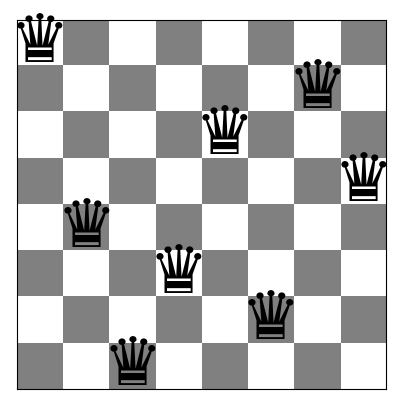

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0005 seconds
Memory usage: 0.20 KiB
#######################################################################################
Starting run 1 for Backtracking


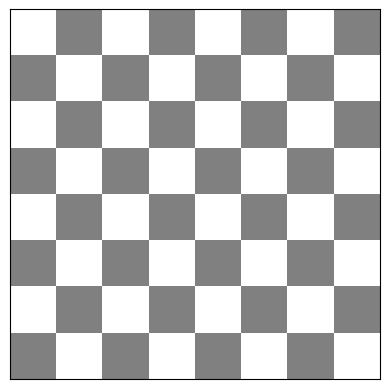

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]


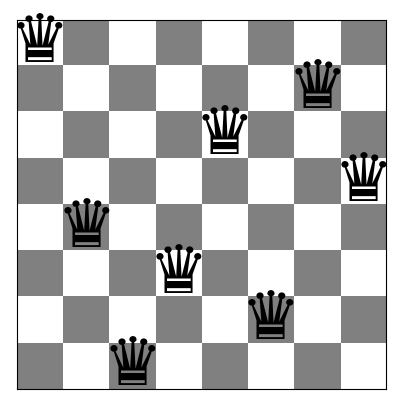

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0008 seconds
Memory usage: 0.20 KiB

Ending 0 run
#######################################################################################

#######################################################################################
Starting run 2 for Backtracking


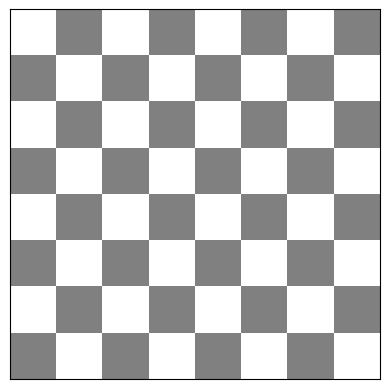

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]


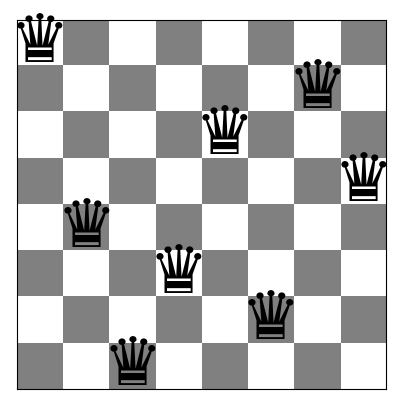

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0008 seconds
Memory usage: 0.20 KiB

Ending 1 run
#######################################################################################

#######################################################################################
Starting run 3 for Backtracking


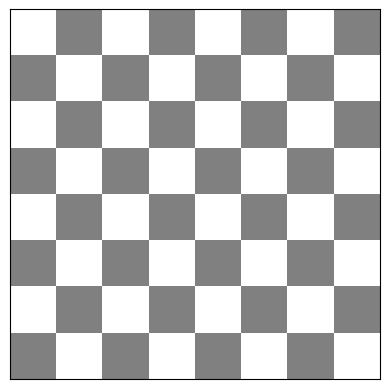

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]


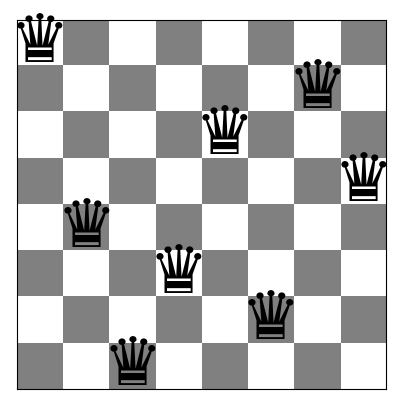

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0006 seconds
Memory usage: 0.20 KiB

Ending 2 run
#######################################################################################

#######################################################################################
Starting run 4 for Backtracking


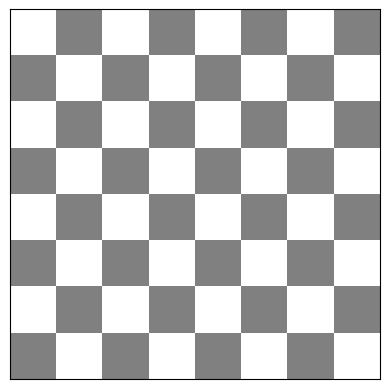

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]


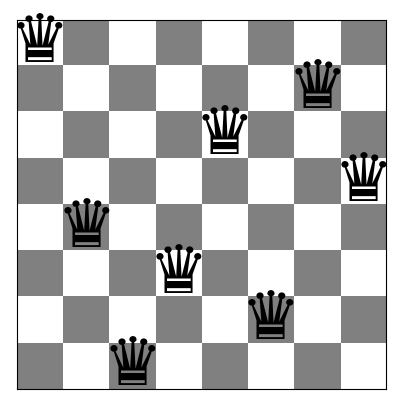

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0018 seconds
Memory usage: 0.20 KiB

Ending 3 run
#######################################################################################

#######################################################################################
Starting run 5 for Backtracking


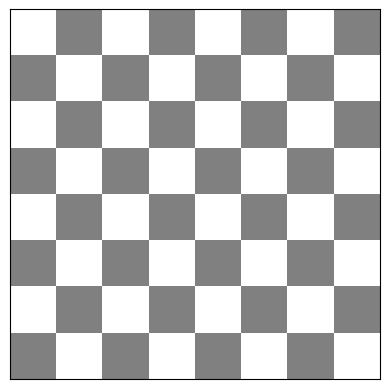

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]


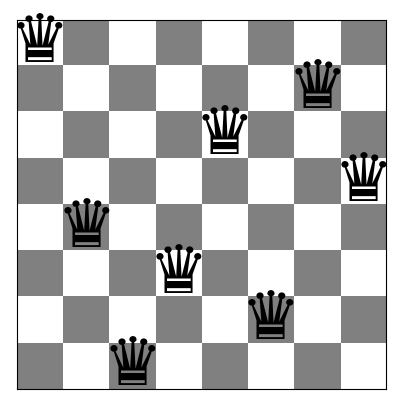

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0014 seconds
Memory usage: 0.20 KiB

Ending 4 run
#######################################################################################

#######################################################################################
Starting run 6 for Backtracking


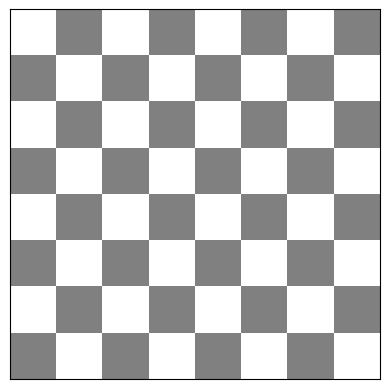

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]


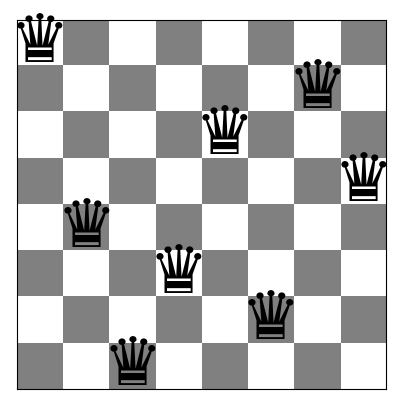

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0007 seconds
Memory usage: 0.20 KiB

Ending 5 run
#######################################################################################

#######################################################################################
Starting run 7 for Backtracking


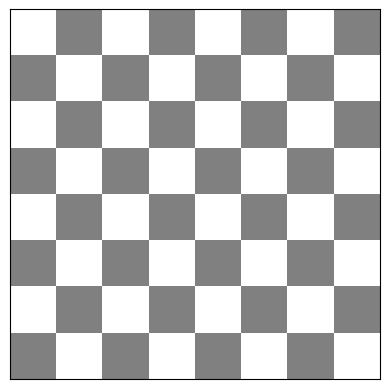

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]


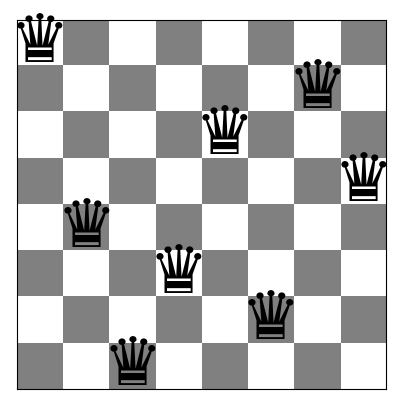

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0007 seconds
Memory usage: 0.20 KiB

Ending 6 run
#######################################################################################

#######################################################################################
Starting run 8 for Backtracking


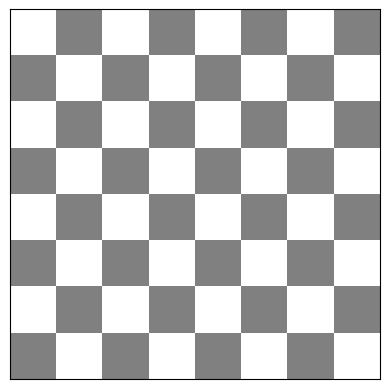

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]


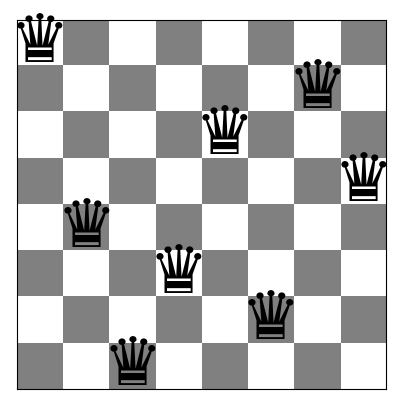

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0007 seconds
Memory usage: 0.20 KiB

Ending 7 run
#######################################################################################

#######################################################################################
Starting run 9 for Backtracking


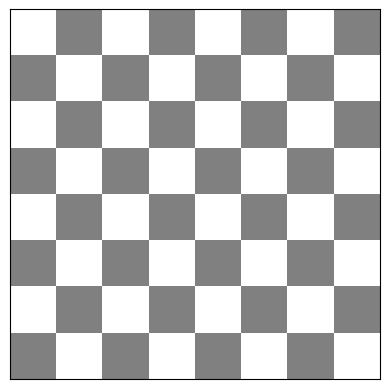

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]


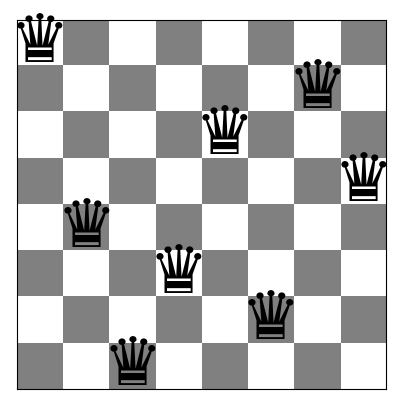

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0011 seconds
Memory usage: 0.20 KiB

Ending 8 run
#######################################################################################

#######################################################################################
Starting run 10 for Backtracking


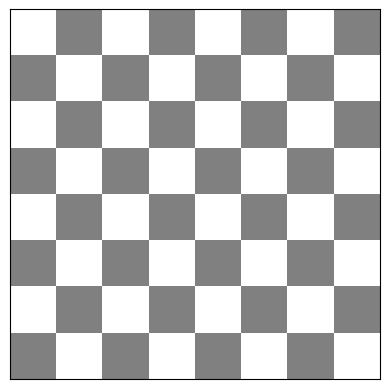

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]


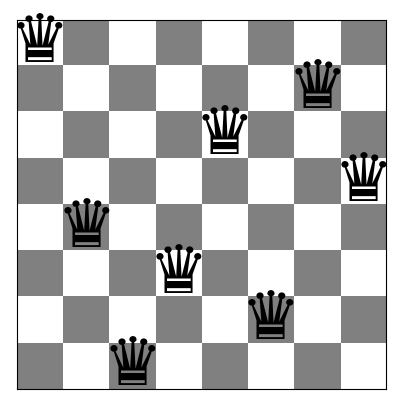

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0011 seconds
Memory usage: 0.20 KiB

Ending 9 run
#######################################################################################

#######################################################################################


average runtime :  0.0009710311889648438 seconds 
 average memmory usage : 0.203125  kib


In [ ]:
board_size = 8
backtracking_results= run_experiment(Backtracking,board_size, 'Backtracking')
print ('average runtime : ',backtracking_results[0],'seconds \n', 'average memmory usage :',backtracking_results[1],' kib')

Non-solution state:


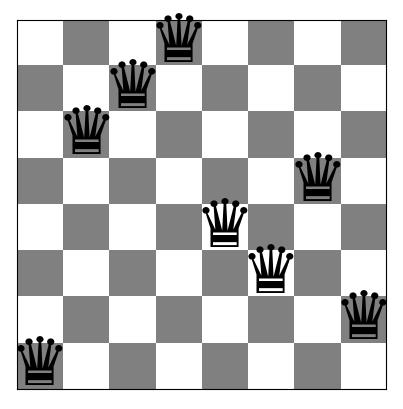

Queens [L-r] at rows: (7, 2, 1, 0, 4, 5, 3, 6)
First valid solution found:


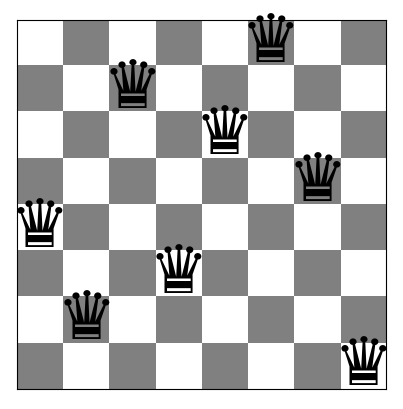

Queens [L-r] at rows: (4, 6, 1, 5, 2, 0, 3, 7)
Number of checked states before finding the solution: 2
Time to find the first solution: 0.4313 seconds
Memory usage: 4437.84 KiB


(2, 0.4313066005706787, 4437.8359375, (4, 6, 1, 5, 2, 0, 3, 7))

In [ ]:
def bruteforce(p=None):
    """
    Executes the Brute Force algorithm for the N-Queens problem.
    This algorithm generates all possible configurations of N queens on an N×N chessboard and evaluates each
    to determine if it represents a valid solution where no two queens threaten each other. It leverages the concept
    of permutations to explore the solution space exhaustively and finds the first solution that meets the criteria.
    Parameters:
    - p (bool): When True, displays the chessboard for the first configuration found during the search.
                When False, displays the chessboard only for the final solution.

    Returns:
    - tuple: Contains the number of states checked before finding the first valid solution, the total execution time
             (excluding print time), and the memory usage in KiB.

    Additionally, this function prints the first solution found,one non-solution state, the number of states checked and the total execution time,
    and the memory usage.
    """
    N = 8  # Board size
    StateCount = [0]  # Visited state counter
    nonSolutionPrinted = False  # Flag to ensure only one non-solution state is printed
    StartTime = time.time()  # Start time for the entire process
    # Start measuring memory usage
    tracemalloc.start()
    snapshot1 = tracemalloc.take_snapshot()  # First Snapshot
    Perms = list(permutations(range(N)))  # All possible permutations
    random.shuffle(Perms)  # Shuffle to ensure randomness
    for perm in Perms:
        StateCount[0] += 1  # Count each state checked
        # Check constraints
        if any(abs(perm[i] - perm[j]) == abs(i - j) for i in range(len(perm)) for j in range(i + 1, len(perm))):
            if not nonSolutionPrinted and p==True:  # If a non-solution hasn't been printed yet
                print("Non-solution state:")
                print_board(perm)
                nonSolutionPrinted = True
                continue  # Skip further processing and move to the next permutation
        else:
            if nonSolutionPrinted or p==None:  # Only print the valid solution after printing a non-solution
                print("First valid solution found:")
                print_board(perm)
                break  # Exit after finding the first valid solution
    EndTime = time.time()  # Time after completing the search
    TotalTime = EndTime - StartTime
    snapshot2 = tracemalloc.take_snapshot()
    tracemalloc.stop()
    # Memory usage calculation
    Memory = snapshot2.compare_to(snapshot1, 'lineno')
    # Print metrics
    print(f"Number of checked states before finding the solution: {StateCount[0]}")
    print(f"Time to find the first solution: {TotalTime:.4f} seconds")
    print(f"Memory usage: {Memory[0].size_diff / 1024:.2f} KiB")

    return StateCount[0], TotalTime, Memory[0].size_diff / 1024, perm

# Example usage
bruteforce(p=True)

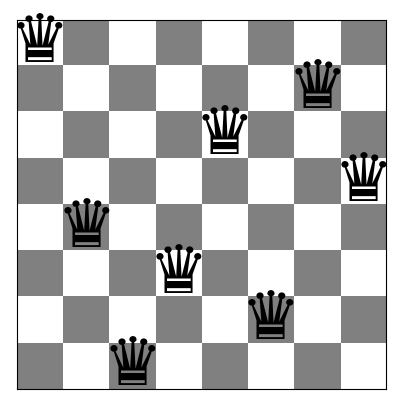

Queens [L-r] at rows: [0, 4, 7, 5, 2, 6, 1, 3]
Total number of checked states: 113
Total time: 0.0007 seconds
Memory usage: 0.20 KiB
#######################################################################################
Starting run 1 for Brute Force


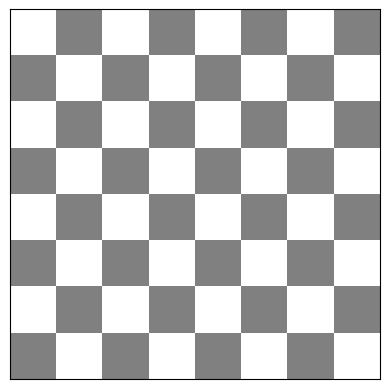

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]
First valid solution found:


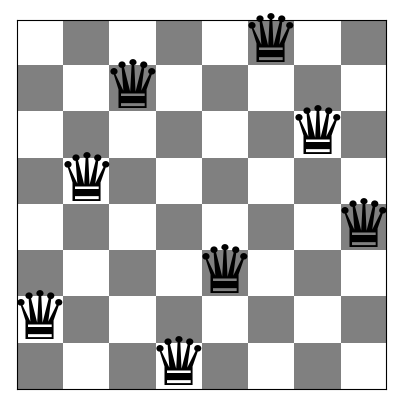

Queens [L-r] at rows: (6, 3, 1, 7, 5, 0, 2, 4)
Number of checked states before finding the solution: 380
Time to find the first solution: 0.2868 seconds
Memory usage: 4234.81 KiB

Ending 0 run
#######################################################################################

#######################################################################################
Starting run 2 for Brute Force


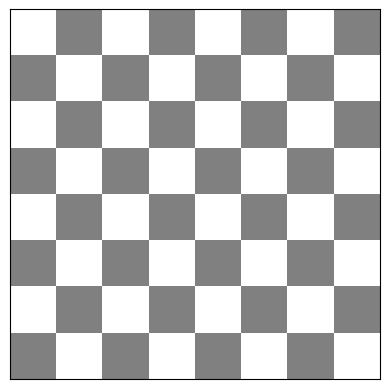

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]
First valid solution found:


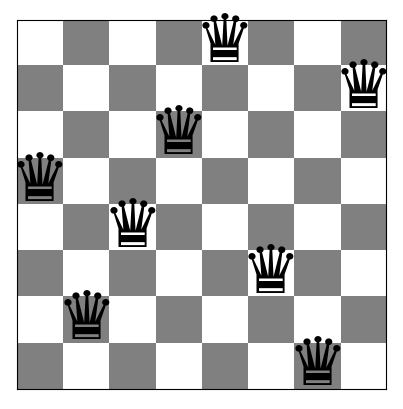

Queens [L-r] at rows: (3, 6, 4, 2, 0, 5, 7, 1)
Number of checked states before finding the solution: 194
Time to find the first solution: 0.3391 seconds
Memory usage: 4234.81 KiB

Ending 1 run
#######################################################################################

#######################################################################################
Starting run 3 for Brute Force


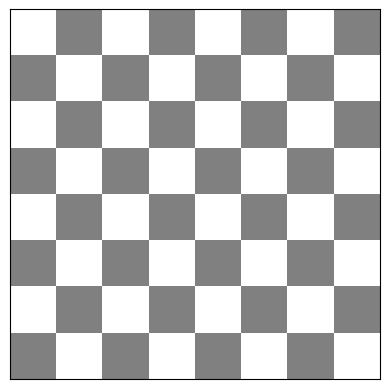

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]
First valid solution found:


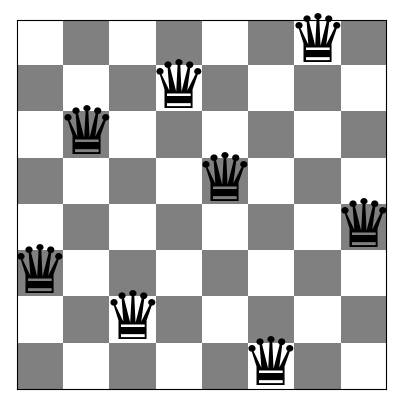

Queens [L-r] at rows: (5, 2, 6, 1, 3, 7, 0, 4)
Number of checked states before finding the solution: 910
Time to find the first solution: 0.2950 seconds
Memory usage: 4234.81 KiB

Ending 2 run
#######################################################################################

#######################################################################################
Starting run 4 for Brute Force


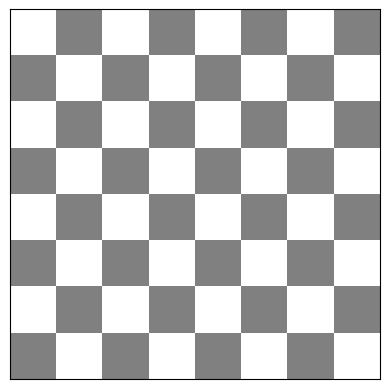

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]
First valid solution found:


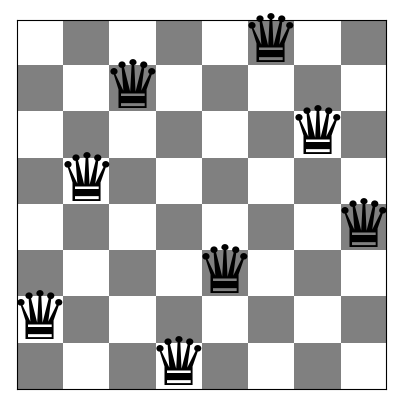

Queens [L-r] at rows: (6, 3, 1, 7, 5, 0, 2, 4)
Number of checked states before finding the solution: 445
Time to find the first solution: 0.3928 seconds
Memory usage: 4234.81 KiB

Ending 3 run
#######################################################################################

#######################################################################################
Starting run 5 for Brute Force


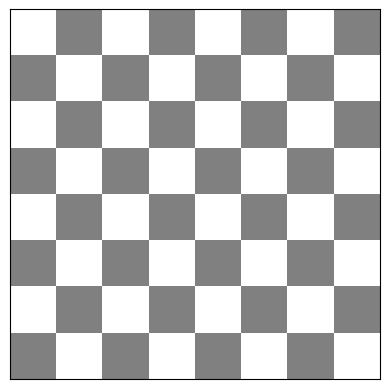

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]
First valid solution found:


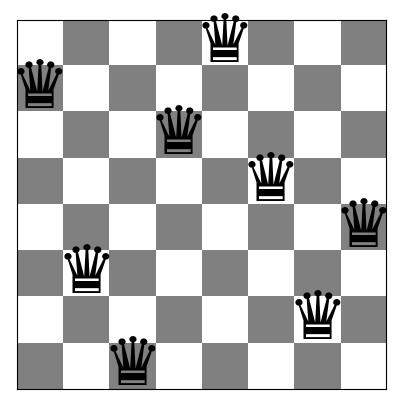

Queens [L-r] at rows: (1, 5, 7, 2, 0, 3, 6, 4)
Number of checked states before finding the solution: 693
Time to find the first solution: 0.3154 seconds
Memory usage: 4234.81 KiB

Ending 4 run
#######################################################################################

#######################################################################################
Starting run 6 for Brute Force


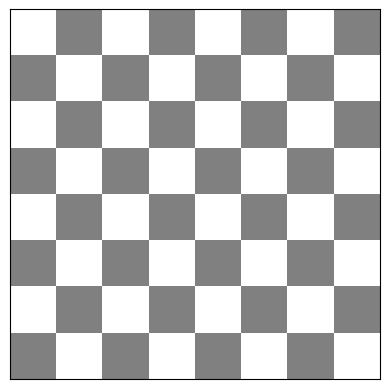

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]
First valid solution found:


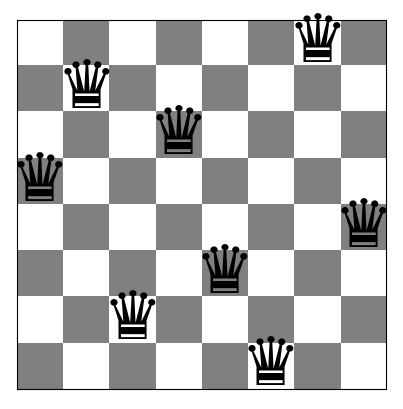

Queens [L-r] at rows: (3, 1, 6, 2, 5, 7, 0, 4)
Number of checked states before finding the solution: 155
Time to find the first solution: 0.2894 seconds
Memory usage: 4234.81 KiB

Ending 5 run
#######################################################################################

#######################################################################################
Starting run 7 for Brute Force


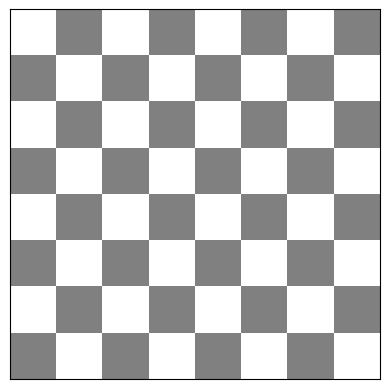

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]
First valid solution found:


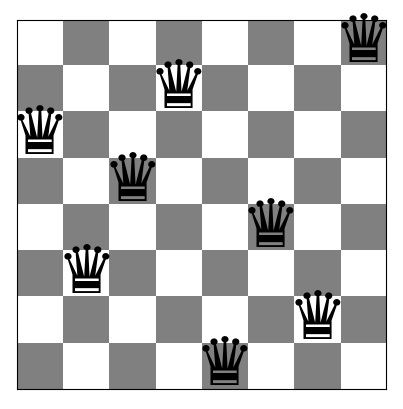

Queens [L-r] at rows: (2, 5, 3, 1, 7, 4, 6, 0)
Number of checked states before finding the solution: 349
Time to find the first solution: 0.3807 seconds
Memory usage: 4234.81 KiB

Ending 6 run
#######################################################################################

#######################################################################################
Starting run 8 for Brute Force


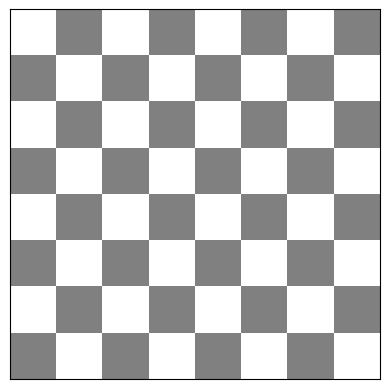

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]
First valid solution found:


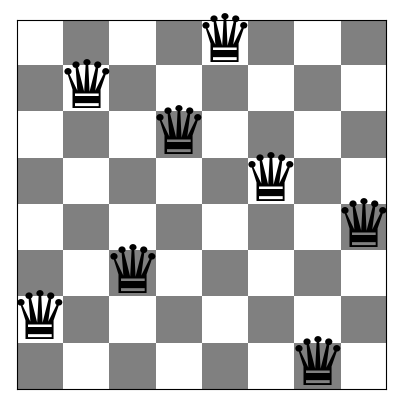

Queens [L-r] at rows: (6, 1, 5, 2, 0, 3, 7, 4)
Number of checked states before finding the solution: 727
Time to find the first solution: 0.2937 seconds
Memory usage: 4234.81 KiB

Ending 7 run
#######################################################################################

#######################################################################################
Starting run 9 for Brute Force


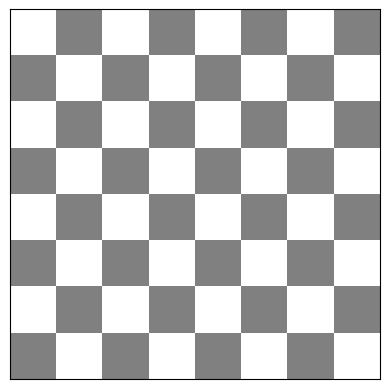

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]
First valid solution found:


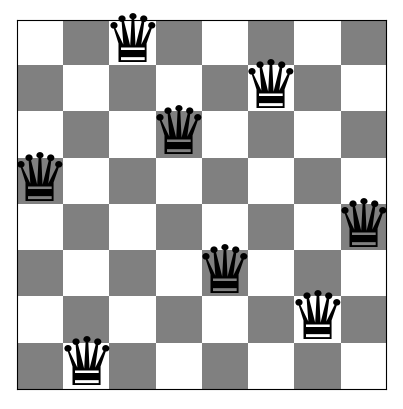

Queens [L-r] at rows: (3, 7, 0, 2, 5, 1, 6, 4)
Number of checked states before finding the solution: 113
Time to find the first solution: 0.2859 seconds
Memory usage: 4234.81 KiB

Ending 8 run
#######################################################################################

#######################################################################################
Starting run 10 for Brute Force


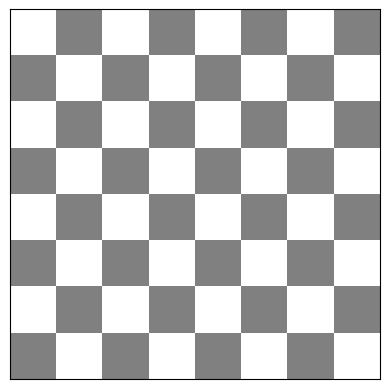

Queens [L-r] at rows: [None, None, None, None, None, None, None, None]
First valid solution found:


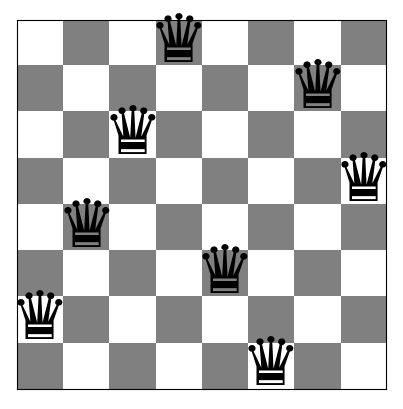

Queens [L-r] at rows: (6, 4, 2, 0, 5, 7, 1, 3)
Number of checked states before finding the solution: 827
Time to find the first solution: 0.2945 seconds
Memory usage: 4234.81 KiB

Ending 9 run
#######################################################################################

#######################################################################################


average runtime :  0.317317271232605 seconds 
 average memmory usage : 4234.8125  kib


In [ ]:
board_size = 8
brute_results= run_experiment(bruteforce,board_size, 'Brute Force',10)
print ('average runtime : ',brute_results[0],'seconds \n', 'average memmory usage :',brute_results[1],' kib')

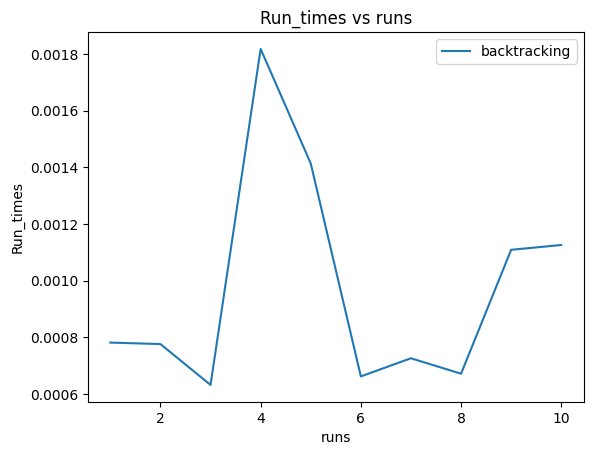

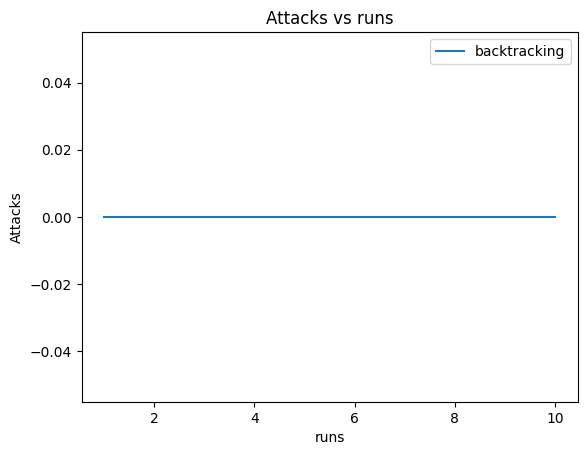

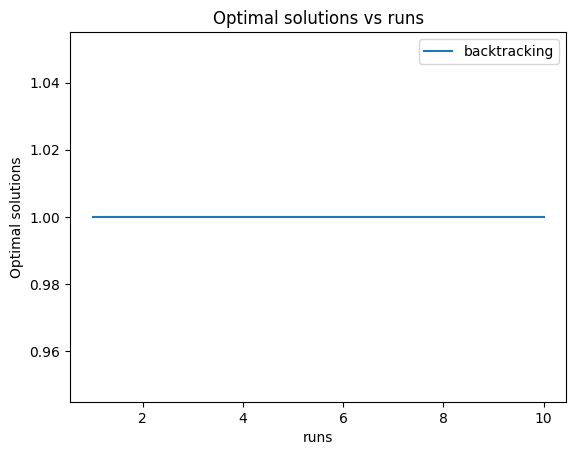

In [ ]:
plot_results(backtracking_results)

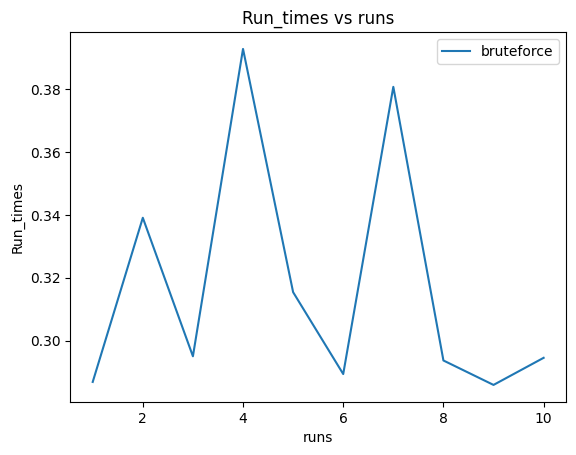

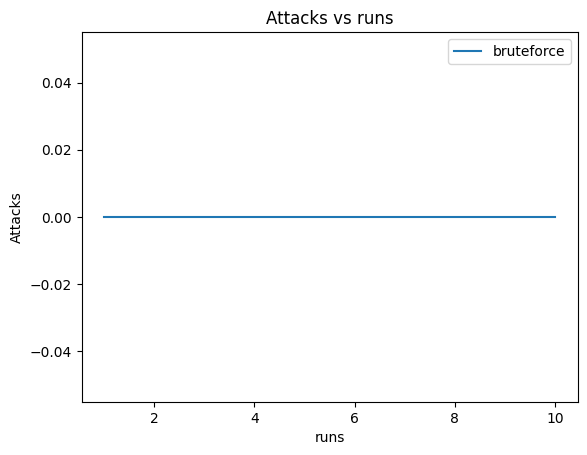

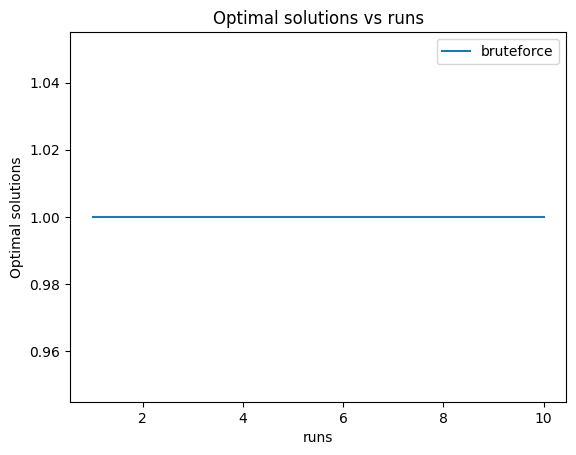

In [ ]:
plot_results(None,brute_results)

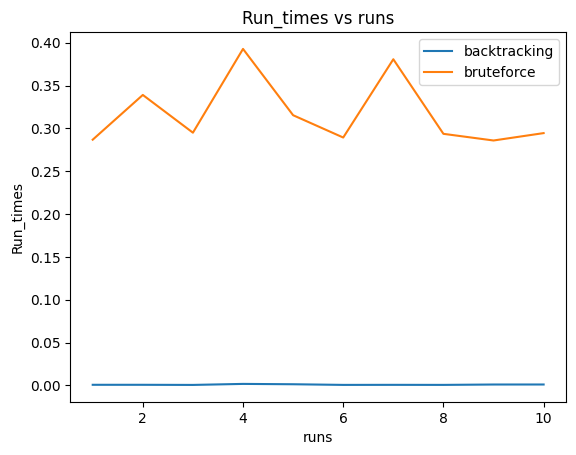

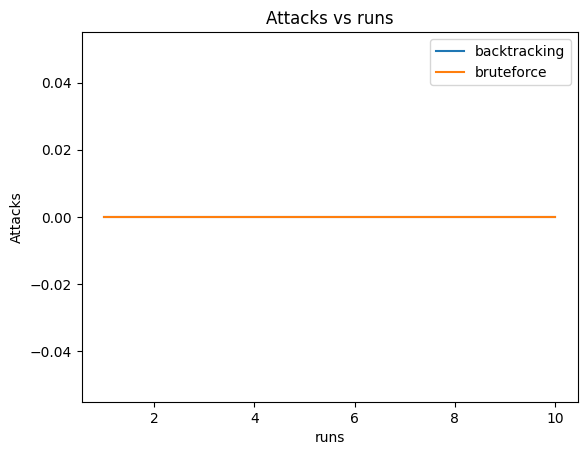

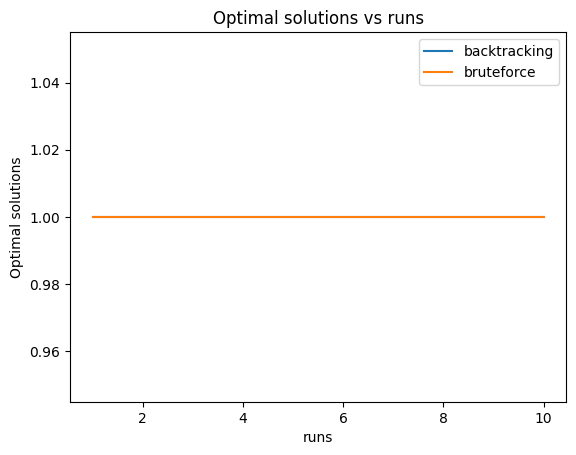

In [ ]:
plot_results(backtracking_results,brute_results)